## STATISTICAL TESTS

In [1]:
import scipy.stats as stats
from scipy.stats import kruskal, shapiro, levene
# from scipy.stats import f_oneway
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

### 1) REPRODUCIBILITY: DIFFERENCES BETWEEN DATASETS

#### 1.1) ERROR METRICS: RMSE

Saphiro-Wilk to check normality in distributions, Levene for equal variances between groups --> Assmptions of one-way ANOVA: If not, non-parametric test.

In [43]:
with open('MLP_model/MLP_1RMSE_predictions.json') as json_file:
    rmse_dict1 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
mlp_list1 = [value for key, value in rmse_dict1.items()]

with open('MLP_model/MLP_2RMSE_predictions.json') as json_file:
    rmse_dict2 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
mlp_list2 = [value for key, value in rmse_dict2.items()]

with open('MLP_model/MLP_3RMSE_predictions.json') as json_file:
    rmse_dict3 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
mlp_list3 = [value for key, value in rmse_dict3.items()]

In [33]:
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([mlp_list1, mlp_list2, mlp_list3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(mlp_list1, mlp_list2, mlp_list3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8151988983154297, P-value: 3.2020908478433213e-29
Group: 2, Statistic: 0.8788704872131348, P-value: 1.9564667500283412e-24
Group: 3, Statistic: 0.8239853978157043, P-value: 1.4729336473566154e-28

Levene test results:
Statistic: 1.5740325756347577, P-value: 0.20742353913850275


In [44]:
from scipy.stats import f_oneway

# Assuming mlp_list1, mlp_list2, and mlp_list3 are your three groups of data

# Perform ANOVA test
anova_stat, anova_p_value = f_oneway(mlp_list1, mlp_list2, mlp_list3)

print("\nANOVA test results:")
print(f"Statistic: {anova_stat}, P-value: {anova_p_value}")

if anova_p_value < 0.05:
    print("The ANOVA test indicates significant differences among the groups.")
else:
    print("The ANOVA test does not indicate significant differences among the groups.")



ANOVA test results:
Statistic: 1.2107648302818044, P-value: 0.2981527613744146
The ANOVA test does not indicate significant differences among the groups.


In [34]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(mlp_list1, mlp_list2, mlp_list3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 0.5853752224347772, P-value: 0.7462552260502844


--------------

In [45]:
#LSTM
with open('LSTM_model/LSTM_1RMSE_predictions.json') as json_file:
    rmse_dict1 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
lstm_list1 = [value for key, value in rmse_dict1.items()]

with open('LSTM_model/LSTM_2RMSE_predictions.json') as json_file:
    rmse_dict2 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
lstm_list2 = [value for key, value in rmse_dict2.items()]

with open('LSTM_model/LSTM_3RMSE_predictions.json') as json_file:
    rmse_dict3 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
lstm_list3 = [value for key, value in rmse_dict3.items()]

# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([lstm_list1, lstm_list2, lstm_list3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(lstm_list1, lstm_list2, lstm_list3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(lstm_list1, lstm_list2, lstm_list3)
print("ANOVA for RMSE in LSTM datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8601451516151428, P-value: 5.546892095096264e-26
Group: 2, Statistic: 0.8305448889732361, P-value: 3.061075461021503e-28
Group: 3, Statistic: 0.9306379556655884, P-value: 1.1676816534946623e-18

Levene test results:
Statistic: 0.7836940435848221, P-value: 0.45683358567477506
ANOVA for RMSE in LSTM datasets: 
F-statistic: 0.22782562510169613
P-value: 0.7962804593989106


In [37]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(lstm_list1, lstm_list2, lstm_list3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 0.04060470437597814, P-value: 0.9799023528920373


--------------------

In [46]:
#CNN
with open('CNN_model/CNN_1RMSE_predictions.json') as json_file:
    rmse_dict1 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
cnn_list1 = [value for key, value in rmse_dict1.items()]

with open('CNN_model/CNN_2RMSE_predictions.json') as json_file:
    rmse_dict2 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
cnn_list2 = [value for key, value in rmse_dict2.items()]

with open('CNN_model/CNN_3RMSE_predictions.json') as json_file:
    rmse_dict3 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
cnn_list3 = [value for key, value in rmse_dict3.items()]

# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([cnn_list1, cnn_list2, cnn_list3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(cnn_list1, cnn_list2, cnn_list3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(cnn_list1, cnn_list2, cnn_list3)
print("ANOVA for RMSE in CNN datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8596526980400085, P-value: 5.0635274361834043e-26
Group: 2, Statistic: 0.8699067234992981, P-value: 3.211267609361045e-25
Group: 3, Statistic: 0.9388085603713989, P-value: 1.6926320596348013e-17

Levene test results:
Statistic: 0.4629210516574291, P-value: 0.6294989870029408
ANOVA for RMSE in CNN datasets: 
F-statistic: 0.544695413114323
P-value: 0.5800907105451589


In [39]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(cnn_list1, cnn_list2, cnn_list3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 0.13631285937481152, P-value: 0.9341143389335727


#### 1.2) PERF METRICS: FORECAST BIAS  

In [47]:
with open('MLP_model/MLP_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

mlp_fb1 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        mlp_fb1.append(value)

##############################################
with open('MLP_model/MLP_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

mlp_fb2 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        mlp_fb2.append(value)

#############################################
with open('MLP_model/MLP_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

mlp_fb3 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        mlp_fb3.append(value)

################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([mlp_fb1, mlp_fb2, mlp_fb3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(mlp_fb1, mlp_fb2, mlp_fb3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")
# 
f_statistic, p_value = stats.f_oneway(mlp_fb1, mlp_fb2, mlp_fb3)
print("ANOVA for Forecast Bias in MLP datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8988865613937378, P-value: 1.820858965068471e-22
Group: 2, Statistic: 0.9771080017089844, P-value: 7.40949523958534e-10
Group: 3, Statistic: 0.9361764192581177, P-value: 6.964157654175823e-18

Levene test results:
Statistic: 0.769687531147056, P-value: 0.4632730198773355
ANOVA for Forecast Bias in MLP datasets: 
F-statistic: 0.29837902512730874
P-value: 0.7420477952553347


In [41]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(mlp_fb1, mlp_fb2, mlp_fb3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 1.334746217882639, P-value: 0.5130545475581643


In [48]:
with open('LSTM_model/LSTM_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

lstm_fb1 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        lstm_fb1.append(value)

##############################################
with open('LSTM_model/LSTM_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

lstm_fb2 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        lstm_fb2.append(value)

#############################################
with open('LSTM_model/LSTM_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

lstm_fb3 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        lstm_fb3.append(value)

################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([lstm_fb1, lstm_fb2, lstm_fb3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(lstm_fb1, lstm_fb2, lstm_fb3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(lstm_fb1, lstm_fb2, lstm_fb3)
print("ANOVA for Forecast Bias in LSTM datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.9468827247619629, P-value: 2.710953035186826e-16
Group: 2, Statistic: 0.8646580576896667, P-value: 1.1646571073955166e-25
Group: 3, Statistic: 0.9811691641807556, P-value: 1.4919406154945136e-08

Levene test results:
Statistic: 0.3707350538483002, P-value: 0.690266643586902
ANOVA for Forecast Bias in LSTM datasets: 
F-statistic: 0.6440466760382956
P-value: 0.525254456473407


In [43]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(lstm_fb1, lstm_fb2, lstm_fb3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 0.8264296889883553, P-value: 0.6615201435988398


In [49]:
with open('CNN_model/CNN_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

cnn_fb1 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        cnn_fb1.append(value)

##############################################
with open('CNN_model/CNN_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

cnn_fb2 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        cnn_fb2.append(value)

#############################################
with open('CNN_model/CNN_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

cnn_fb3 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        cnn_fb3.append(value)

################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([cnn_fb1, cnn_fb2, cnn_fb3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(cnn_fb1, cnn_fb2, cnn_fb3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(cnn_fb1, cnn_fb2, cnn_fb3)
print("ANOVA for Forecast Bias in CNN datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.9555014371871948, P-value: 8.778342839416663e-15
Group: 2, Statistic: 0.9159655570983887, P-value: 1.270606693445347e-20
Group: 3, Statistic: 0.9890932440757751, P-value: 1.316134148510173e-05

Levene test results:
Statistic: 0.9663222693811115, P-value: 0.3806289976759528
ANOVA for Forecast Bias in CNN datasets: 
F-statistic: 1.8510279417688398
P-value: 0.15730167678418386


In [45]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(cnn_fb1, cnn_fb2, cnn_fb3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 2.3772186219575815, P-value: 0.30464463555946947


#### 1.3) PERF METRICS: FIC 

In [50]:
# FORECAST INTERVAL COVERAGE
def calculate_coverage(predictions_dict):
    # Dictionary to store FIC for each patient
    fic_dict = {}

    # Calculate FIC for each patient
    for key, value in predictions_dict.items():
        predictions = value['predictions']
        true_values = value['true_values']

        # Assuming you have a function to generate forecast intervals based on predictions
        forecasted_intervals = generate_forecast_intervals(predictions)

        # Calculate FIC for the current patient
        fic = calculate_coverage_for_patient(forecasted_intervals, true_values)
        
        # Store FIC in the dictionary
        fic_dict[key] = fic

    return fic_dict

def calculate_coverage_for_patient(forecasted_intervals, actual_values):
    # Calculate the number of actual values that fall within the intervals
    num_within_interval = sum((lower <= actual <= upper) for actual, (lower, upper) in zip(actual_values, forecasted_intervals))

    # Calculate the total number of observations
    total_observations = len(actual_values)

    # Calculate the coverage or FIC by dividing both values
    fic = num_within_interval / total_observations * 100

    return fic

def generate_forecast_intervals(predictions):
    # Check if predictions is a list of floats
    if all(isinstance(x, (int, float)) for x in predictions):
        return [(prediction - 0.1, prediction + 0.1) for prediction in predictions]
    # Check if predictions is a list of lists
    elif all(isinstance(x, list) and len(x) > 0 and isinstance(x[0], (int, float)) for x in predictions):
        return [(prediction[0] - 0.1, prediction[0] + 0.1) for prediction in predictions]
    else:
        raise ValueError("Predictions must be a list of floats or a list of lists with numeric values")

In [51]:
with open('MLP_model/MLP_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
mlp_fic1 = list(fic_dict.values())

############################
with open('MLP_model/MLP_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
mlp_fic2 = list(fic_dict.values())

############################
with open('MLP_model/MLP_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
mlp_fic3 = list(fic_dict.values())

######################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([mlp_fic1, mlp_fic2, mlp_fic3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(mlp_fic1, mlp_fic2, mlp_fic3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(mlp_fic1, mlp_fic2, mlp_fic3)
print("ANOVA for FIC in MLP datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8565427660942078, P-value: 2.8630988568313356e-26
Group: 2, Statistic: 0.8511987924575806, P-value: 9.859820691077809e-27
Group: 3, Statistic: 0.851163387298584, P-value: 1.308366024726287e-26

Levene test results:
Statistic: 0.9154841770477541, P-value: 0.40046367730519583
ANOVA for FIC in MLP datasets: 
F-statistic: 0.5744775590194884
P-value: 0.5630769746540378


In [47]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(mlp_fic1, mlp_fic2, mlp_fic3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 0.7979777977011926, P-value: 0.6709981501628153


--------------

In [52]:
with open('LSTM_model/LSTM_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
lstm_fic1 = list(fic_dict.values())

############################
with open('LSTM_model/LSTM_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
lstm_fic2 = list(fic_dict.values())

############################
with open('LSTM_model/LSTM_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
lstm_fic3 = list(fic_dict.values())

######################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([lstm_fic1, lstm_fic2, lstm_fic3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(lstm_fic1, lstm_fic2, lstm_fic3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(lstm_fic1, lstm_fic2, lstm_fic3)
print("ANOVA for FIC in LSTM datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8474898338317871, P-value: 5.739538938536233e-27
Group: 2, Statistic: 0.8583060503005981, P-value: 3.55091345936694e-26
Group: 3, Statistic: 0.8721065521240234, P-value: 6.544845143848213e-25

Levene test results:
Statistic: 1.037995005554615, P-value: 0.3543243418428211
ANOVA for FIC in LSTM datasets: 
F-statistic: 0.5627200459180779
P-value: 0.5697332329860012


In [49]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(lstm_fic1, lstm_fic2, lstm_fic3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 1.034803629335164, P-value: 0.5960672309521884


-----------------------

In [53]:
with open('CNN_model/CNN_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
cnn_fic1 = list(fic_dict.values())

############################
with open('CNN_model/CNN_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
cnn_fic2 = list(fic_dict.values())

############################
with open('CNN_model/CNN_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
cnn_fic3 = list(fic_dict.values())

######################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([cnn_fic1, cnn_fic2, cnn_fic3], ['1', '2', '3']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(cnn_fic1, cnn_fic2, cnn_fic3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

f_statistic, p_value = stats.f_oneway(cnn_fic1, cnn_fic2, cnn_fic3)
print("ANOVA for FIC in CNN datasets: ")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk test results:
Group: 1, Statistic: 0.8532015085220337, P-value: 1.5680841488515188e-26
Group: 2, Statistic: 0.8438729047775269, P-value: 2.763053498456625e-27
Group: 3, Statistic: 0.8654364347457886, P-value: 1.790242540682278e-25

Levene test results:
Statistic: 1.5046624872543004, P-value: 0.22230343100942646
ANOVA for FIC in CNN datasets: 
F-statistic: 1.2920917899182458
P-value: 0.27488819539560505


In [51]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(cnn_fic1, cnn_fic2, cnn_fic3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 0.6971528516264758, P-value: 0.7056919798794781


#### 2.1) Model error metrics

Shapiro-Wilk test results:
Group: MLP, Statistic: 0.8353375196456909, P-value: 2.802596928649634e-44
Group: LSTM, Statistic: 0.8706560134887695, P-value: 1.294687677158985e-40
Group: CNN, Statistic: 0.8872349262237549, P-value: 1.329924448083204e-38

Levene test results:
Statistic: 4.991967713557123, P-value: 0.006835005177474175


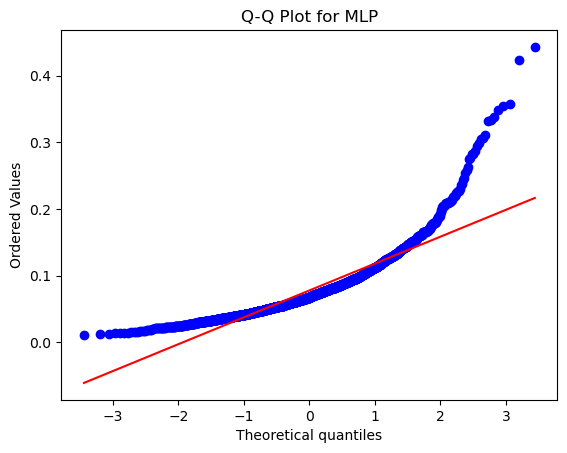

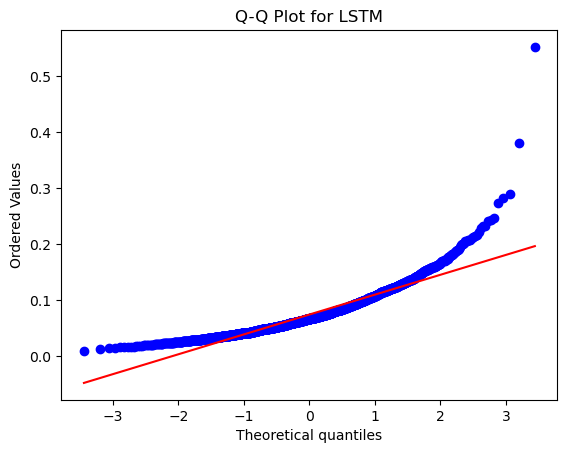

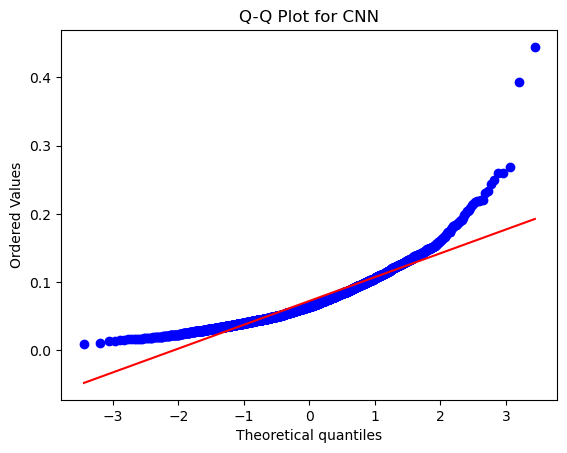

In [3]:
#Create vectors of 30 values

with open('MLP_model/MLP_1RMSE_predictions.json') as json_file:
    rmse_mlp1 = json.load(json_file)

with open('MLP_model/MLP_2RMSE_predictions.json') as json_file:
    rmse_mlp2 = json.load(json_file)
    
with open('MLP_model/MLP_3RMSE_predictions.json') as json_file:
    rmse_mlp3 = json.load(json_file)

mlp_list1 = [value for key, value in rmse_mlp1.items()]
mlp_list2 = [value for key, value in rmse_mlp2.items()]
mlp_list3 = [value for key, value in rmse_mlp3.items()]

mlp_list1.extend(mlp_list2)
mlp_list1.extend(mlp_list3)

###############################################################
with open('LSTM_model/LSTM_1RMSE_predictions.json') as json_file:
    rmse_lstm1 = json.load(json_file)

with open('LSTM_model/LSTM_2RMSE_predictions.json') as json_file:
    rmse_lstm2 = json.load(json_file)
    
with open('LSTM_model/LSTM_3RMSE_predictions.json') as json_file:
    rmse_lstm3 = json.load(json_file)

lstm_list1 = [value for key, value in rmse_lstm1.items()]
lstm_list2 = [value for key, value in rmse_lstm2.items()]
lstm_list3 = [value for key, value in rmse_lstm3.items()]

lstm_list1.extend(lstm_list2)
lstm_list1.extend(lstm_list3)

###############################################################
with open('CNN_model/CNN_1RMSE_predictions.json') as json_file:
    rmse_cnn1 = json.load(json_file)

with open('CNN_model/CNN_2RMSE_predictions.json') as json_file:
    rmse_cnn2 = json.load(json_file)
    
with open('CNN_model/CNN_3RMSE_predictions.json') as json_file:
    rmse_cnn3 = json.load(json_file)

cnn_list1 = [value for key, value in rmse_cnn1.items()]
cnn_list2 = [value for key, value in rmse_cnn2.items()]
cnn_list3 = [value for key, value in rmse_cnn3.items()]

cnn_list1.extend(cnn_list2)
cnn_list1.extend(cnn_list3)

###############################################################

# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([mlp_list1, lstm_list1, cnn_list1], ['MLP', 'LSTM', 'CNN']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(mlp_list1, lstm_list2, cnn_list3)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

# f_statistic, p_value = stats.f_oneway(mlp_list1, mlp_list2, mlp_list3)
# print("ANOVA for RMSE between models: ")
# print(f"F-statistic: {f_statistic}")
# print(f"P-value: {p_value}")

import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
data_sets = [mlp_list1, lstm_list1, cnn_list1]
names = ['MLP', 'LSTM', 'CNN']

# Create QQ plots
for data, name in zip(data_sets, names):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {name}")
    plt.show()

In [17]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(mlp_list1, mlp_list2, mlp_list3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 4.799243581440351, P-value: 0.09075227015026181


In [4]:
from scipy.stats import friedmanchisquare

# Assuming you have your performance metrics stored in lists or arrays: 
# dl_model1_metrics, dl_model2_metrics, dl_model3_metrics

# Perform Friedman test
friedman_stat, friedman_p_value = friedmanchisquare(mlp_list1, lstm_list1, cnn_list1)

# Print Friedman test results
print("Friedman test results:")
print(f"Statistic: {friedman_stat}, P-value: {friedman_p_value}")

Friedman test results:
Statistic: 84.49433487200804, P-value: 4.490433885750453e-19


In [7]:
import scikit_posthocs as sp
import numpy as np

#combine three groups into one array
data = np.array([mlp_list1, lstm_list1, cnn_list1])

#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)

,0,1,2
0,1.000000,0.687771,0.001
1,0.687771,1.000000,0.001
2,0.001000,0.001000,1.000


In [21]:
# Calculate mean
mean = np.mean(cnn_list1)

# Calculate median
median = np.median(cnn_list1)

# Calculate standard deviation
std_dev = np.std(cnn_list1)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 0.07242167713468409
Median: 0.06423413753509521
Standard Deviation: 0.037033020835306095


#### 2.2) Model performance metrics

In [10]:
with open('MLP_model/MLP_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

mlp_fb1 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        mlp_fb1.append(value)

with open('MLP_model/MLP_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

for value in forecast_bias_dict.values():
    if not np.isnan(value):
        mlp_fb1.append(value)

with open('MLP_model/MLP_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

for value in forecast_bias_dict.values():
    if not np.isnan(value):
        mlp_fb1.append(value)

##############################################
with open('LSTM_model/LSTM_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

lstm_fb1 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        lstm_fb1.append(value)

with open('LSTM_model/LSTM_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

for value in forecast_bias_dict.values():
    if not np.isnan(value):
        lstm_fb1.append(value)

with open('LSTM_model/LSTM_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

for value in forecast_bias_dict.values():
    if not np.isnan(value):
        lstm_fb1.append(value)
        
#############################################
with open('CNN_model/CNN_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

cnn_fb1 = []
for value in forecast_bias_dict.values():
    if not np.isnan(value):
        cnn_fb1.append(value)

with open('CNN_model/CNN_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

for value in forecast_bias_dict.values():
    if not np.isnan(value):
        cnn_fb1.append(value)

with open('CNN_model/CNN_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

forecast_bias_dict = {}

for key, value in predictions_by_patient.items():
    predictions = value['predictions']
    true_values = value['true_values']

    # Calculate forecast differences
    differences = [predicted - actual for predicted, actual in zip(predictions, true_values)]
    # Calculate forecast bias
    bias = sum(differences) / len(differences)
    forecast_bias_dict[key] = bias

for value in forecast_bias_dict.values():
    if not np.isnan(value):
        cnn_fb1.append(value)
        
################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([mlp_fb1, lstm_fb1, cnn_fb1], ['MLP', 'LSTM', 'CNN']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(mlp_fb1, lstm_fb1, cnn_fb1)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

Shapiro-Wilk test results:
Group: MLP, Statistic: 0.9366274476051331, P-value: 9.857726659046565e-31
Group: LSTM, Statistic: 0.928296685218811, P-value: 2.4330705334266183e-32
Group: CNN, Statistic: 0.9532901644706726, P-value: 6.027663836006396e-27

Levene test results:
Statistic: 3.4722711281132357, P-value: 0.031098831606968698


In [4]:
# # Perform Kruskal-Wallis test
# kruskal_stat, kruskal_p_value = kruskal(mlp_fb1, mlp_fb2, mlp_fb3)
# print("Kruskal-Wallis test results:")
# print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 45.36480407694489, P-value: 1.4098014677581694e-10


In [12]:
from scipy.stats import friedmanchisquare

# Assuming you have your performance metrics stored in lists or arrays: 
# dl_model1_metrics, dl_model2_metrics, dl_model3_metrics

# Perform Friedman test
friedman_stat, friedman_p_value = friedmanchisquare(mlp_fb1, lstm_fb1, cnn_fb1)

# Print Friedman test results
print("Friedman test results:")
print(f"Statistic: {friedman_stat}, P-value: {friedman_p_value}")


Friedman test results:
Statistic: 647.2077213596313, P-value: 2.8882114420153143e-141


In [13]:
#combine three groups into one array
data = np.array([mlp_fb1, lstm_fb1, cnn_fb1])

#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)

,0,1,2
0,1.000,0.001,0.900
1,0.001,1.000,0.001
2,0.900,0.001,1.000


In [24]:
# Calculate mean
mean = np.mean(lstm_fb1)

# Calculate median
median = np.median(lstm_fb1)

# Calculate standard deviation
std_dev = np.std(lstm_fb1)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: -0.016050328134703272
Median: -0.014151019707043971
Standard Deviation: 0.036486008021491934


-----------------

In [26]:
# FORECAST INTERVAL COVERAGE
def calculate_coverage(predictions_dict):
    # Dictionary to store FIC for each patient
    fic_dict = {}

    # Calculate FIC for each patient
    for key, value in predictions_dict.items():
        predictions = value['predictions']
        true_values = value['true_values']

        # Assuming you have a function to generate forecast intervals based on predictions
        forecasted_intervals = generate_forecast_intervals(predictions)

        # Calculate FIC for the current patient
        fic = calculate_coverage_for_patient(forecasted_intervals, true_values)
        
        # Store FIC in the dictionary
        fic_dict[key] = fic

    return fic_dict

def calculate_coverage_for_patient(forecasted_intervals, actual_values):
    # Calculate the number of actual values that fall within the intervals
    num_within_interval = sum((lower <= actual <= upper) for actual, (lower, upper) in zip(actual_values, forecasted_intervals))

    # Calculate the total number of observations
    total_observations = len(actual_values)

    # Calculate the coverage or FIC by dividing both values
    fic = num_within_interval / total_observations * 100

    return fic

def generate_forecast_intervals(predictions):
    # Check if predictions is a list of floats
    if all(isinstance(x, (int, float)) for x in predictions):
        return [(prediction - 0.1, prediction + 0.1) for prediction in predictions]
    # Check if predictions is a list of lists
    elif all(isinstance(x, list) and len(x) > 0 and isinstance(x[0], (int, float)) for x in predictions):
        return [(prediction[0] - 0.1, prediction[0] + 0.1) for prediction in predictions]
    else:
        raise ValueError("Predictions must be a list of floats or a list of lists with numeric values")

In [29]:
mlp_fic1 = []
with open('MLP_model/MLP_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
mlp_fic1 = list(fic_dict.values())

with open('MLP_model/MLP_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
mlp_fic2 = list(fic_dict.values())

with open('MLP_model/MLP_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
mlp_fic3 = list(fic_dict.values())

mlp_fic1.extend(mlp_fic2)
mlp_fic1.extend(mlp_fic3)

############################
lstm_fic1 = []
with open('LSTM_model/LSTM_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
lstm_fic1 = list(fic_dict.values())

with open('LSTM_model/LSTM_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
lstm_fic2 = list(fic_dict.values())

with open('LSTM_model/LSTM_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
lstm_fic3 = list(fic_dict.values())

lstm_fic1.extend(lstm_fic2)
lstm_fic1.extend(lstm_fic3)

############################
cnn_fic1 = []
with open('CNN_model/CNN_1predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
cnn_fic1 = list(fic_dict.values())

with open('CNN_model/CNN_2predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
cnn_fic2 = list(fic_dict.values())

with open('CNN_model/CNN_3predictions_by_patient.json') as json_file:
    predictions_by_patient = json.load(json_file)

fic_dict = calculate_coverage(predictions_by_patient)
cnn_fic3 = list(fic_dict.values())

cnn_fic1.extend(cnn_fic2)
cnn_fic1.extend(cnn_fic3)

######################
# Perform Shapiro-Wilk test for each group
shapiro_results = []
for data, name in zip([mlp_fic1, lstm_fic1, cnn_fic1], ['MLP', 'LSTM', 'CNN']):
    stat, p_value = shapiro(data)
    shapiro_results.append((name, stat, p_value))

print("Shapiro-Wilk test results:")
for name, stat, p_value in shapiro_results:
    print(f"Group: {name}, Statistic: {stat}, P-value: {p_value}")

# Perform Levene test
levene_stat, levene_p_value = levene(mlp_fic1, lstm_fic1, cnn_fic1)
print("\nLevene test results:")
print(f"Statistic: {levene_stat}, P-value: {levene_p_value}")

Shapiro-Wilk test results:
Group: MLP, Statistic: 0.8534409999847412, P-value: 1.7109854249406016e-42
Group: LSTM, Statistic: 0.8600379824638367, P-value: 8.531105050809486e-42
Group: CNN, Statistic: 0.8543375134468079, P-value: 2.121565874987773e-42

Levene test results:
Statistic: 11.136805601432622, P-value: 1.482070692666375e-05


In [31]:
len(cnn_fic1)

2383

In [7]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(mlp_fic1, mlp_fic2, mlp_fic3)
print("Kruskal-Wallis test results:")
print(f"Statistic: {kruskal_stat}, P-value: {kruskal_p_value}")

Kruskal-Wallis test results:
Statistic: 6.963627797109075, P-value: 0.03075158016548246


In [16]:
from scipy.stats import friedmanchisquare

# Assuming you have your performance metrics stored in lists or arrays: 
# dl_model1_metrics, dl_model2_metrics, dl_model3_metrics

# Perform Friedman test
friedman_stat, friedman_p_value = friedmanchisquare(mlp_fic1, lstm_fic1, cnn_fic1)

# Print Friedman test results
print("Friedman test results:")
print(f"Statistic: {friedman_stat}, P-value: {friedman_p_value}")

Friedman test results:
Statistic: 54.45279900846646, P-value: 1.4987352888453806e-12


In [18]:
#combine three groups into one array
data = np.array([mlp_fic1, lstm_fic1, cnn_fic1])

#perform Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)



,0,1,2
0,1.00000,0.011260,0.001000
1,0.01126,1.000000,0.046109
2,0.00100,0.046109,1.000000


In [27]:
# Calculate mean
mean = np.mean(mlp_fic1)

# Calculate median
median = np.median(mlp_fic1)

# Calculate standard deviation
std_dev = np.std(mlp_fic1)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 81.88417960553923
Median: 90.0
Standard Deviation: 18.361777172144404


### 3) GENDER AND AGE GROUP EFFECTS

In [6]:
series = pd.read_csv("data/model_data02.csv")
series.head()

,patient_id,week,score,gender,Attention,Executive Functions,Gnosis,Language,Memory,Visuospatial Skills,age_Preescolar(0-5),age_Children(6-11),age_Teenagers(12-18),age_Young Adults(19-34),age_Middle-Aged Adults(35-64),age_Senior Adults(>65),age_group,combined_target
0,b13fd4a3,00-2018,0.2609,1,0.263250,0.260900,0.381300,0.262460,0.267238,0.326500,0,0,0,0,1,0,5,1_5
1,b13fd4a3,01-2017,0.3879,1,0.436600,0.192900,0.420490,0.189686,0.354349,0.484752,0,0,0,0,1,0,5,1_5
2,b13fd4a3,02-2016,0.9722,1,0.504862,0.972200,0.381300,0.974630,0.741500,0.326500,0,0,0,0,1,0,5,1_5
3,b13fd4a3,02-2017,0.3128,1,0.312800,0.453212,0.399528,0.318559,0.370146,0.311938,0,0,0,0,1,0,5,1_5
4,b13fd4a3,02-2018,0.5007,1,0.497261,0.500700,0.381300,0.500700,0.601340,0.326500,0,0,0,0,1,0,5,1_5


In [3]:
with open('MLP_model/MLP_1RMSE_predictions.json') as json_file:
    rmse_dict1 = json.load(json_file)

# Assuming rmse_dict is your dictionary containing data
# Convert dictionary to list of tuples
data_list = [(key, value) for key, value in rmse_dict1.items()]

# Create DataFrame from the list of tuples
df = pd.DataFrame(data_list, columns=['Patient', 'RMSE'])

df.head()


,Patient,RMSE
0,b13fd4a3,0.189626
1,2cccfdd5,0.332660
2,e05868f8,0.274371
3,ce205f7b,0.175740
4,081cae65,0.206467


In [5]:
# Merge DataFrame B with DataFrame A based on 'patient_id' column
merged_df = pd.merge(df, series[['patient_id', 'gender', 'age_group']], how='left', left_on='Patient', right_on='patient_id')

# Drop the redundant 'patient_id' column
merged_df.drop('patient_id', axis=1, inplace=True)

# Print the merged DataFrame with added 'gender' and 'age_group' columns from DataFrame A
merged_df.drop_duplicates(subset='Patient', keep='first', inplace=True)


In [28]:
merged_df[(merged_df['gender']==2) & (merged_df['age_group']==6)]


,Patient,RMSE,gender,age_group
111,2cccfdd5,0.332660,2,6
684,cdefb47d,0.287435,2,6
1702,7bd82c93,0.227619,2,6
2666,b969f878,0.189924,2,6
4783,d90a4eba,0.106298,2,6
...,...,...,...,...
62162,2e4d6a05,0.064023,2,6
62423,80ec4c96,0.041579,2,6
62727,d288bcc2,0.024613,2,6
63252,e4321ed8,0.162285,2,6


In [63]:
# Assuming df is your DataFrame containing RMSE values, gender, and age group
# Conduct Kruskal-Wallis test for gender
kruskal_gender_stat, kruskal_gender_p_value = kruskal(*[merged_df[merged_df['gender'] == gender]['RMSE'] for gender in merged_df['gender'].unique()])
print("Kruskal-Wallis test results for gender:")
print(f"Statistic: {kruskal_gender_stat}, P-value: {kruskal_gender_p_value}")

# Conduct Kruskal-Wallis test for age group
kruskal_age_stat, kruskal_age_p_value = kruskal(*[merged_df[merged_df['age_group'] == age]['RMSE'] for age in merged_df['age_group'].unique()])
print("\nKruskal-Wallis test results for age group:")
print(f"Statistic: {kruskal_age_stat}, P-value: {kruskal_age_p_value}")

Kruskal-Wallis test results for gender:
Statistic: 0.13785435620275166, P-value: 0.7104234588049536

Kruskal-Wallis test results for age group:
Statistic: 6.714093207381211, P-value: 0.2427865459549665


In [88]:
#INTERACTION
from itertools import product
from scipy.stats import kruskal

# Get unique values of gender and age group
unique_genders = merged_df['gender'].unique()
unique_age_groups = merged_df['age_group'].unique()

# Create combinations of gender and age group
interactions = list(product(unique_genders, unique_age_groups))

# Conduct Kruskal-Wallis test for each combination
interaction_results = {}
for gender, age_group in interactions:
    data_subset = merged_df[(merged_df['gender'] == gender) & (merged_df['age_group'] == age_group)]['RMSE']
    # print(f"Gender: {gender}, Age Group: {age_group}, Data Subset: {data_subset}")  # Inspect data subset
    # Check if there are at least two samples in the subset
    if len(data_subset) >= 2:
        # Unpack values from the data subset
        *args, = data_subset
        interaction_results[(gender, age_group)] = kruskal(*args)

# Print Kruskal-Wallis test results for each interaction
print("Kruskal-Wallis test results for interaction between gender and age group:")
for interaction, result in interaction_results.items():
    print(f"Gender: {interaction[0]}, Age Group: {interaction[1]}, Statistic: {result.statistic}, P-value: {result.pvalue}")





Gender: 1, Age Group: 5, Data Subset: 0        0.189626
487      0.206467
827      0.209388
1103     0.178579
2251     0.204085
           ...   
62272    0.071435
63111    0.056746
63184    0.084399
63291    0.045571
63426    0.106862
Name: RMSE, Length: 144, dtype: float64
Gender: 1, Age Group: 6, Data Subset: 237      0.274371
2081     0.282628
2120     0.212265
2159     0.154437
2463     0.072278
           ...   
62500    0.068525
62537    0.069909
62991    0.043573
63148    0.045361
63323    0.042854
Name: RMSE, Length: 116, dtype: float64
Gender: 1, Age Group: 2, Data Subset: 4051     0.165338
4685     0.141631
5084     0.075264
8075     0.124464
8111     0.045879
12848    0.036863
13522    0.077278
17030    0.097290
17088    0.065875
18417    0.091610
19102    0.049660
19340    0.032992
22070    0.073843
22134    0.037188
23529    0.108257
27169    0.079264
30343    0.076314
30674    0.054086
32561    0.041046
35080    0.023238
36827    0.080653
37077    0.046597
37593    0.065

## 4) PLOTS OF PREDICTIONS VS TRUE VALUES PER MODEL

In [225]:
# Assuming df is your DataFram2
filtered_df = series[(series['gender'] == 1) & (series['age_Young Adults(19-34)'] == 1)]

# Extracting unique patient_id values
unique_patient_ids = filtered_df['patient_id'].unique()

print(unique_patient_ids)

['d57ab5c4' '266e6b58' 'f93e9bb0' '747719b9' '364a52b1' '67ec703c'
 '8e7d064d' '83019414' '6687f43a' 'b616b8a5' '6bf4b92c' '137e9694'
 '1e4b399b' 'b16a4621' '633c7310' '317a6537' 'fa61597c' 'c6135019'
 '4b39b1dc' '078f46fe' '1a678a3a' 'ced3f8ac' '3d37a5d3' '5ba78d39'
 '997aa358' '396ad08e' '9b74a0da' '4eb4d72c' 'ff3f979e' '49aafe2d'
 '7e96df2c' '77fb7108' '1585c5bc' '0d729dea' '480ff9f4' '2f47320f'
 '80296709' 'f8f996fe' 'e6ba9691' '97a05322' '21bb91de' 'f7b8a9d0'
 '7be88ffe' '5f9ec33c' '30c60444' 'b67f7436' '9f240e3a' '3973810f'
 '452e3d75' 'ffdeeff3' '2402d51c' 'bb7726aa' '44a24b75' '9232282d'
 'e26841e5' '3d4f4d12' '6a446cff' '96d6d172' '2bfa19ee' '633e05d8'
 'e828a878' '1fa40284' '7c09f7f4' '8c4fdd32' 'eab53526' '751ac457'
 '8f87ec90' '89b1ba0f' '5c246cbf' 'cc392551' 'a44477b1' '2e7c6f1e'
 '5ac6680f' 'ddcf10a9' '0c18a89b' '195790ad' '9e8d22e1' '1501c38f'
 'ec99da58' '3db87e58' 'fbad1f21' '48bb7840' '5ef26c83' '46779563'
 'd62dd905' 'b685a8f6' 'efc07d5b' '9528b659' '36447a40' '39ded

In [2]:
with open('MLP_model/MLP_1predictions_by_patient.json') as json_file:
    df1 = json.load(json_file)

with open('LSTM_model/LSTM_1predictions_by_patient.json') as json_file:
    df2 = json.load(json_file)

with open('CNN_model/CNN_1predictions_by_patient.json') as json_file:
    df3 = json.load(json_file)

plots = ['80701971', '58b0016d', 'bcdfdba3', '00f80ac3', '1fa48010', 'aa5daaa0',
         '8e7d064d', '035959ee', '570376ca', 'e322be2d', 'ad0550d0', '2e4d6a05']

In [3]:
# plots = ['80701971', '58b0016d', '00f80ac3', '9fa52161', '1fa48010', 'aa5daaa0',
         # 'ced3f8ac', '035959ee', '570376ca', 'e322be2d', 'ad0550d0', '2e4d6a05']


In [4]:
dfs1 = {}  # Dictionary to store dataframes with patient_id as key


for patient_id in plots:
    if patient_id in df1:
        # Extract predictions and true_values from pred_dictionary
        predictions = df1[patient_id]['predictions']
        true_values = df1[patient_id]['true_values']

        # Create a dataframe for each patient
        df_patient = pd.DataFrame({'Predictions': predictions, 'True_Values': true_values})

        # Save the dataframe with patient_id as key
        dfs1[patient_id] = df_patient

dfs2 = {}  # Dictionary to store dataframes with patient_id as key

for patient_id in plots:
    if patient_id in df2:
        # Extract predictions and true_values from pred_dictionary
        predictions = df2[patient_id]['predictions']
        true_values = df2[patient_id]['true_values']

        # Create a dataframe for each patient
        df_patient = pd.DataFrame({'Predictions': predictions, 'True_Values': true_values})

        # Save the dataframe with patient_id as key
        dfs2[patient_id] = df_patient

dfs3 = {}  # Dictionary to store dataframes with patient_id as key

for patient_id in plots:
    if patient_id in df3:
        # Extract predictions and true_values from pred_dictionary
        predictions = df3[patient_id]['predictions']
        true_values = df3[patient_id]['true_values']

        # Create a dataframe for each patient
        df_patient = pd.DataFrame({'Predictions': predictions, 'True_Values': true_values})

        # Save the dataframe with patient_id as key
        dfs3[patient_id] = df_patient

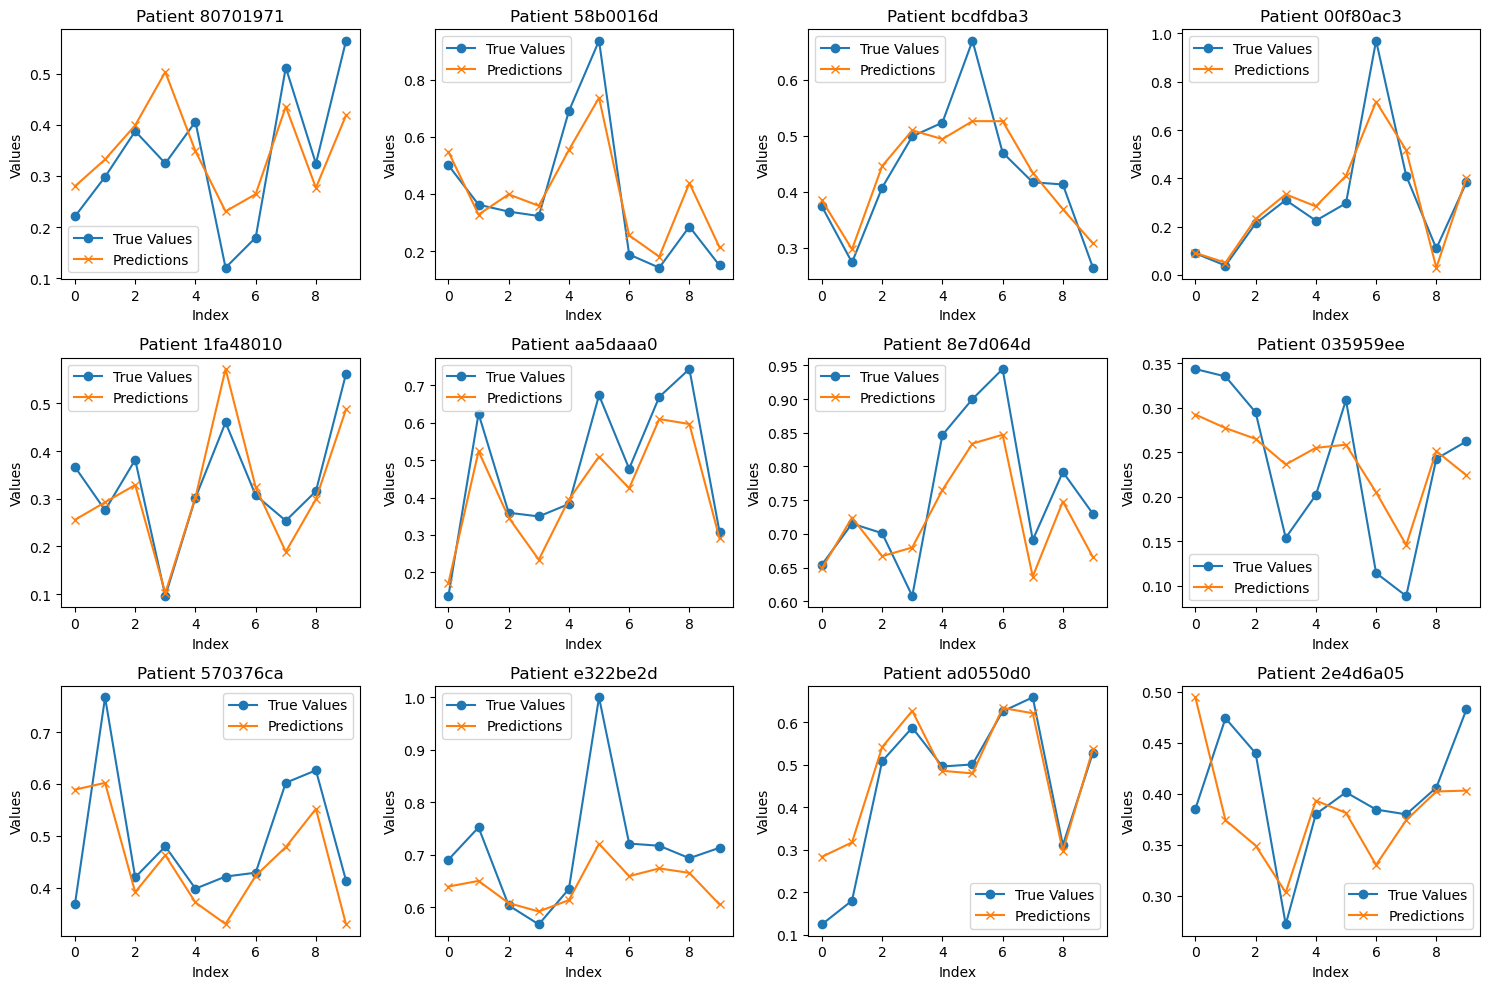

In [5]:
selected_dfs1 = {patient_id: dfs1[patient_id] for patient_id in plots}

#  Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Adjust the number of rows and columns as needed

# Flatten the 2D array of subplots to make it easier to iterate
axes = axes.flatten()

# Iterate over the selected dataframes and plot predictions vs true_values
for i, (patient_id, df1) in enumerate(selected_dfs1.items()):
    ax = axes[i]
    ax.plot(df1['True_Values'], label='True Values', marker='o')
    ax.plot(df1['Predictions'].explode(), label='Predictions', marker='x')  # Flatten the lists using explode
    ax.set_title(f'Patient {patient_id}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

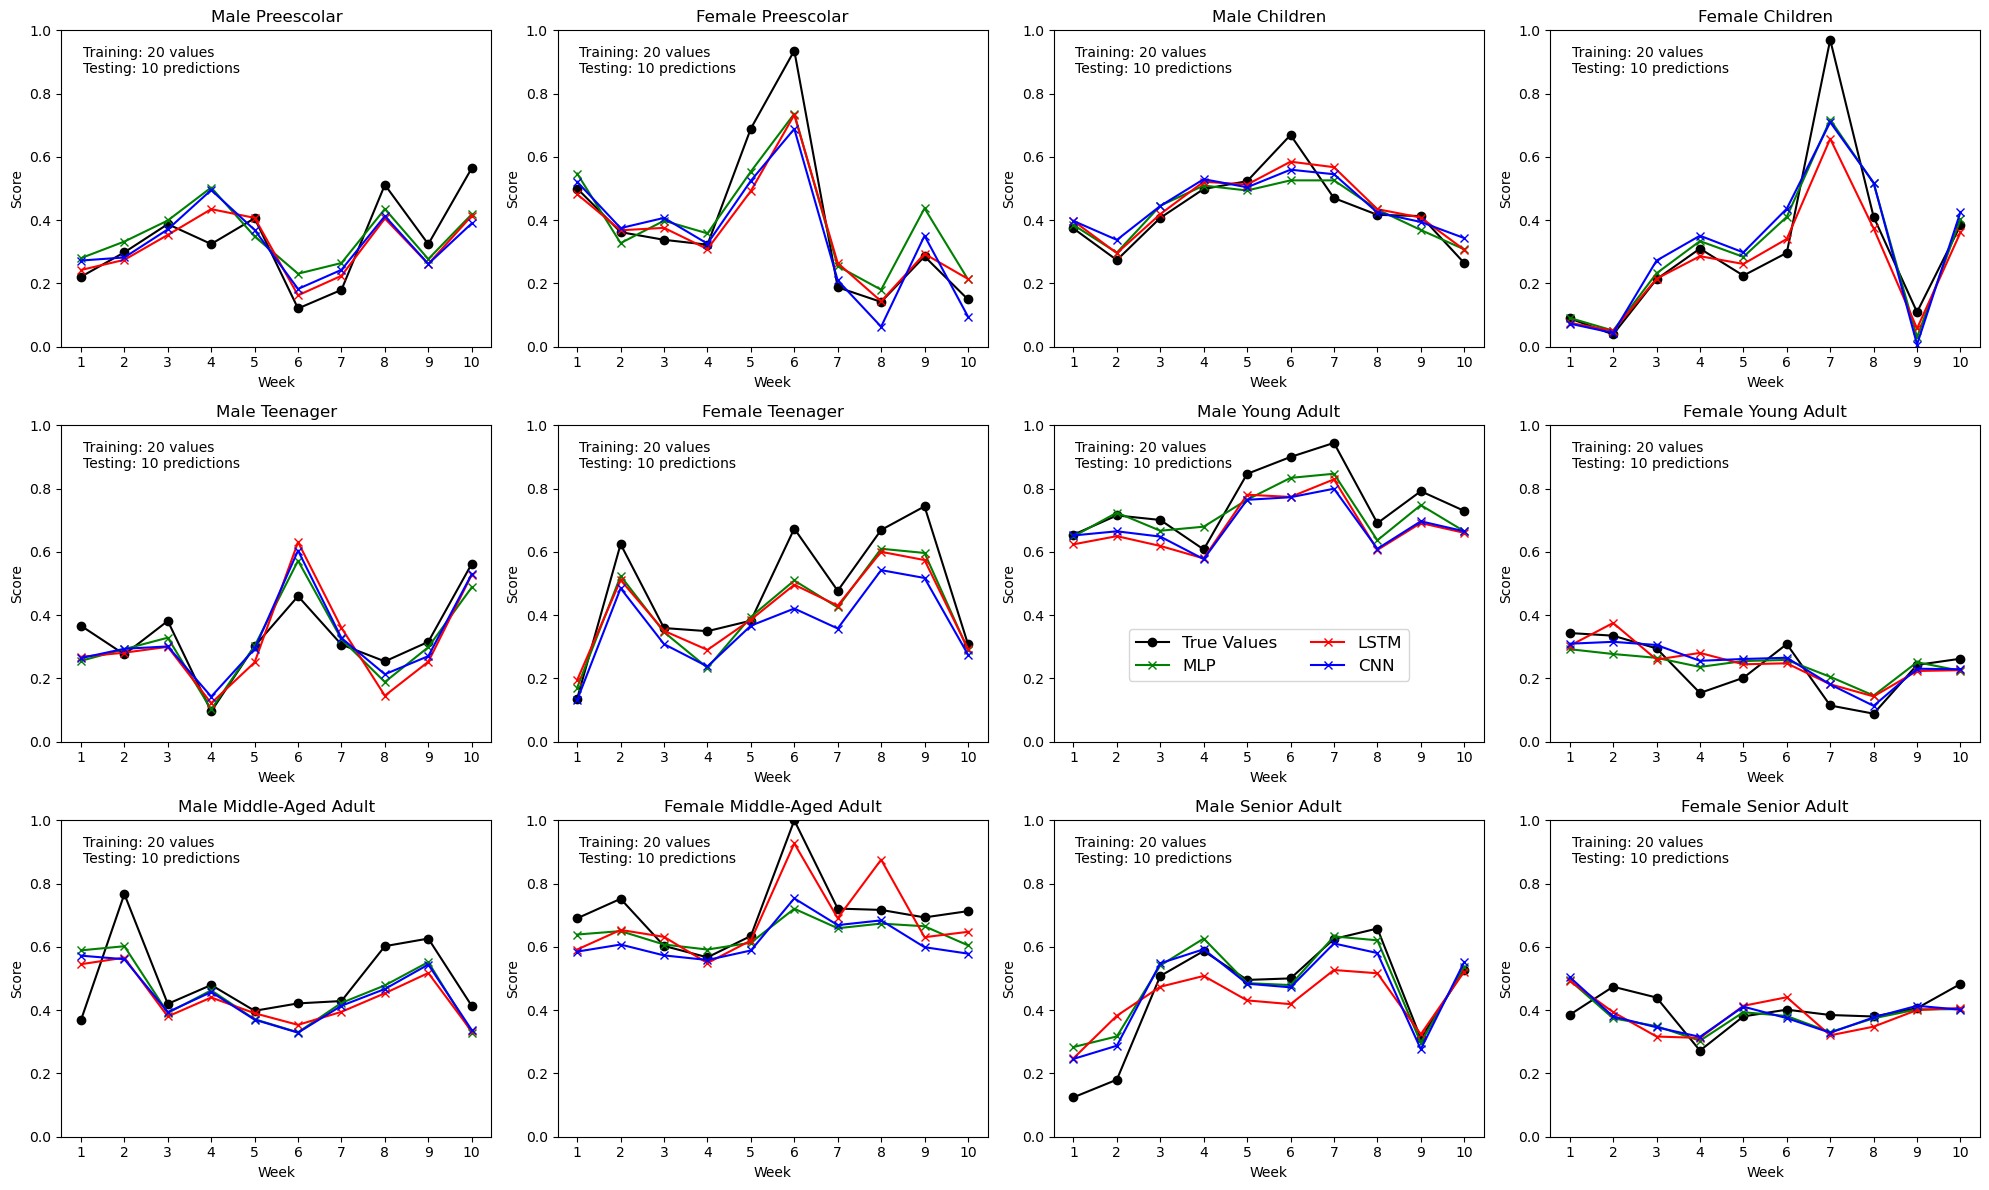

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dfs1, dfs2, and dfs3 are your dictionaries
# Assuming plots contain patient_ids common to all dfs
# Assuming titles is a list containing titles corresponding to each plot
titles = ['Male Preescolar', 'Female Preescolar', 'Male Children', 'Female Children',
          'Male Teenager', 'Female Teenager', 'Male Young Adult', 'Female Young Adult',
          'Male Middle-Aged Adult', 'Female Middle-Aged Adult', 'Male Senior Adult', 'Female Senior Adult']
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))  # Adjust the number of rows and columns as needed

# Flatten the 2D array of subplots to make it easier to iterate
axes = axes.flatten()

# Iterate over the selected dataframes and plot predictions vs true_values
for i, (patient_id, title) in enumerate(zip(plots, titles)):
    ax = axes[i]
    
    df1 = dfs1.get(patient_id, {})
    df2 = dfs2.get(patient_id, {})
    df3 = dfs3.get(patient_id, {})
    
    true_values = df1.get('True_Values', [])  # Assuming true values are the same across all dfs
    
    ax.plot(np.arange(1, len(true_values) + 1), true_values, label='True Values', marker='o', color='black')
    ax.plot(np.arange(1, len(df1.get('Predictions', []).explode()) + 1), df1.get('Predictions', []).explode(), label='MLP', marker='x', color='green')
    ax.plot(np.arange(1, len(df2.get('Predictions', []).explode()) + 1), df2.get('Predictions', []).explode(), label='LSTM', marker='x', color='red')
    ax.plot(np.arange(1, len(df3.get('Predictions', []).explode()) + 1), df3.get('Predictions', []).explode(), label='CNN', marker='x', color='blue')

    ax.set_title(title)
    ax.set_xlabel('Week')
    ax.set_ylabel('Score')
    # ax.legend()

    # Set xticks starting from 1
    ax.set_xticks(np.arange(1, len(true_values) + 1))
    # # Set y-axis limits from 0 to 1
    ax.set_ylim(0, 1)
    
    # Add text annotation for training and testing phases
    ax.text(0.05, 0.95, 'Training: 20 values\nTesting: 10 predictions', transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Create a single legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.637, 0.45), ncol=2, fontsize='large')
# plt.savefig("predvstrue.png")
plt.show()
